In [13]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading reviews dataset

In [4]:
dt_reviews = pd.read_csv("../dataset/olist_order_reviews_dataset.csv", index_col=0)

- <b>review_id</b>: unique review identifier
- <b>order_id</b>: unique order identifier
- <b>review_score</b>: Note ranging from 1 to 5 given by the customer on a satisfaction survey.
- <b>review_comment_title</b>: Comment title from the review left by the customer, in Portuguese.
- <b>review_comment_message</b>: Comment message from the review left by the customer, in Portuguese.
- <b>review_creation_date</b>: Shows the date in which the satisfaction survey was sent to the customer.
- <b>review_answer_timestamp</b>: Shows satisfaction survey answer timestamp.

In [7]:
dt_reviews.head()

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
review_id,,,,,,
7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### First and last review

In [8]:
dt_reviews['review_answer_timestamp'].min()

'2016-10-07 18:32:28'

In [9]:
dt_reviews['review_answer_timestamp'].max()

'2018-10-29 12:27:35'

### Review Scores

In [51]:
dt_reviews['review_score'].isnull().any()

False

In [52]:
dt_reviews['review_score'].value_counts()

5    57420
4    19200
1    11858
3     8287
2     3235
Name: review_score, dtype: int64

In [53]:
dt_reviews_no_na = dt_reviews[['review_score', 'review_comment_message']].dropna()

In [56]:
dt_reviews_count = pd.concat([dt_reviews['review_score'].value_counts(), dt_reviews_no_na['review_score'].value_counts()], axis = 1)

In [58]:
dt_reviews_count.columns = ['all_reviews','reviews_with_comments']

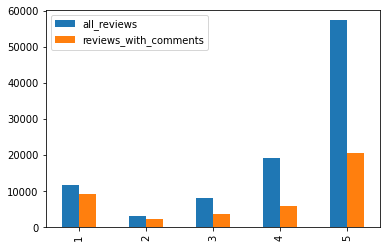

In [59]:
dt_reviews_count.plot.bar()